Used DB scan to find clusters and plot on a map

In [1]:
import os

import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
data_file = os.path.join("data", "locations_lat_lon.parquet")
df = pd.read_parquet(data_file)

/usr/local/lib/python3.6/dist-packages/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [3]:
df.head()

,headline,city,country,lat,lon,country_code
0,Zika Outbreak Hits Miami,Miami,None,25.77427,-80.19366,US
1,Could Zika Reach New York City?,New York City,None,40.71427,-74.00597,US
2,First Case of Zika in Miami Beach,Miami,None,25.77427,-80.19366,US
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Brazil,-8.05389,-34.88111,BR
4,Dallas man comes down with case of Zika,Dallas,None,32.78306,-96.80667,US


In [4]:
location_df =  df[["lat", "lon"]]

location_df = location_df[location_df.lat.notnull() & location_df.lon.notnull()]

location_df.head()

,lat,lon
0,25.77427,-80.19366
1,40.71427,-74.00597
2,25.77427,-80.19366
3,-8.05389,-34.88111
4,32.78306,-96.80667


In [75]:
epsilon = 8
min_points = 7

In [76]:
dbs_model = DBSCAN(eps=epsilon, min_samples=min_points)
news_clusters = dbs_model.fit_predict(location_df)
location_df["cluster_id"] = news_clusters

In [77]:
# Number of clusters
max(news_clusters) + 1

8

In [78]:
location_df.head()

,lat,lon,cluster_id
0,25.77427,-80.19366,0
1,40.71427,-74.00597,0
2,25.77427,-80.19366,0
3,-8.05389,-34.88111,1
4,32.78306,-96.80667,0


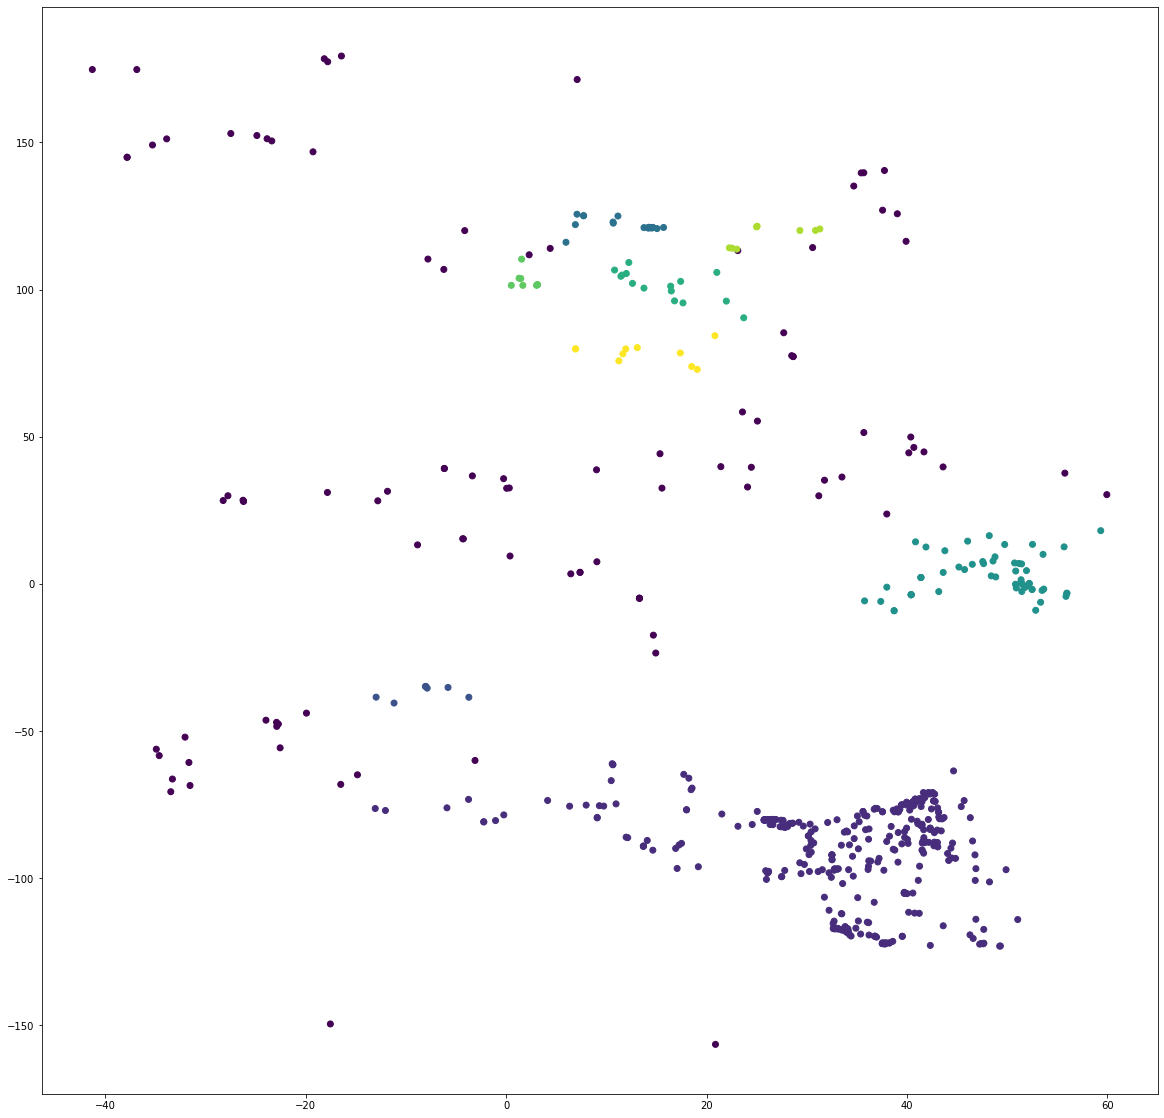

In [79]:
plt.figure(figsize=(20, 20))
plt.scatter(location_df["lat"], location_df["lon"], c=location_df["cluster_id"]);

### Do some mappings

In [80]:
from mpl_toolkits.basemap import Basemap
map_plotter = Basemap()

In [81]:
# fig = plt.figure(figsize=(12, 8))
# # map_plotter.drawcoastlines()
# map_plotter.drawcountries()
# map_plotter.shadedrelief()
# plt.show()

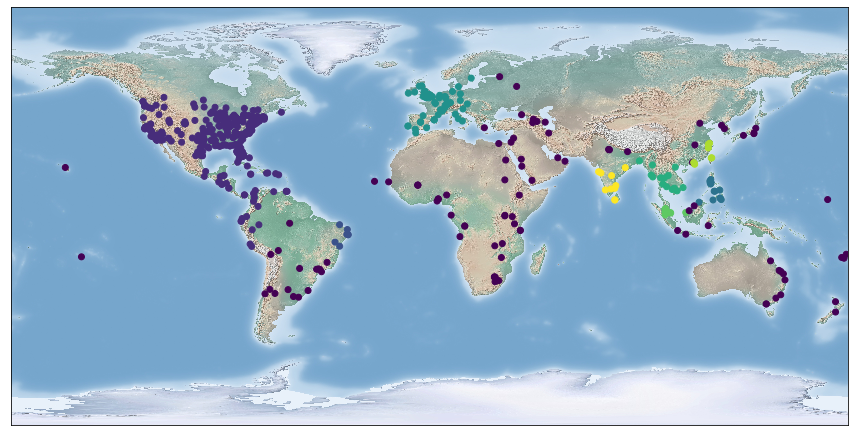

In [88]:
fig = plt.figure(figsize=(15, 15))
map_plotter.scatter(location_df["lon"], location_df["lat"], latlon=True, c=location_df["cluster_id"], label=location_df["cluster_id"])
map_plotter.shadedrelief()
# plt.legend()

In [89]:
# TODO add legend